In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re


df = pd.read_csv('dataset/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
print(df['review'][0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

# Preprocessing

In [3]:
def clean_text(text):
    
    text = text.lower()
    
    text = re.sub(r'<.*?>', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
        
    return text

df['review'] = df['review'].apply(clean_text)

In [6]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [7]:
print(df['review'][0])

one of the other reviewers has mentioned that after watching just oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictures 

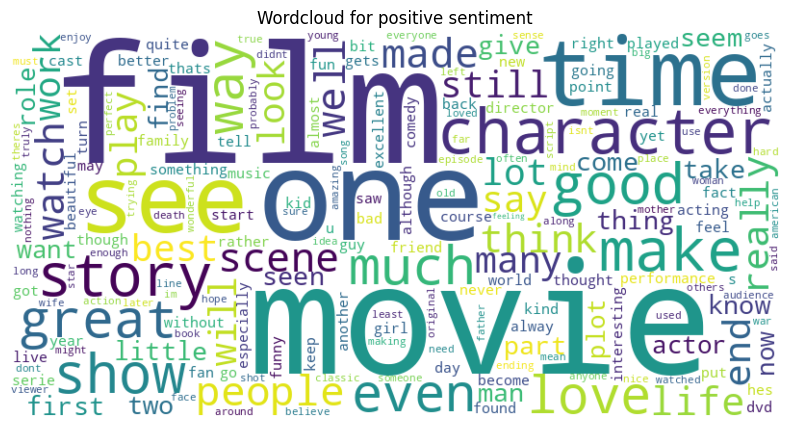

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

positive_sentiment = df[df['sentiment'] == 'positive']
text = ' '.join(positive_sentiment['review'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.title('Wordcloud for positive sentiment')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



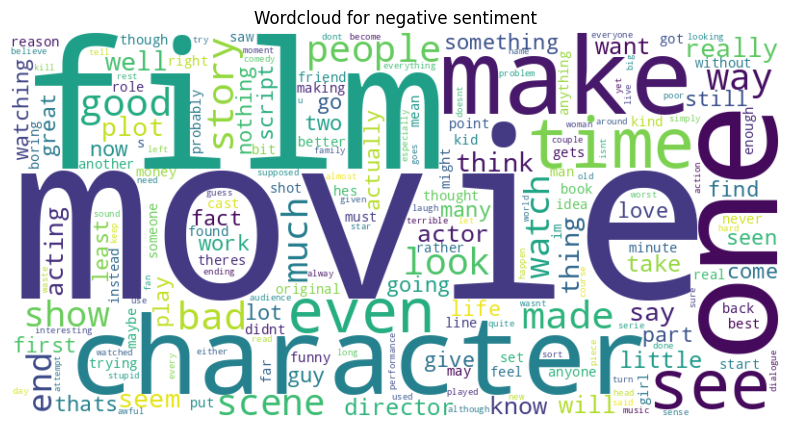

In [9]:
positive_sentiment = df[df['sentiment'] == 'negative']
text = ' '.join(positive_sentiment['review'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.title('Wordcloud for negative sentiment')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Split Dataset

In [24]:
x = df['review']
y = df['sentiment']

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(x, y, test_size=0.2)


# Tokenize

In [27]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 1000
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

In [28]:
len(tokenizer.word_index)

185942

In [29]:
train_sequence = tokenizer.texts_to_sequences(X_train)
test_sequence = tokenizer.texts_to_sequences(X_test)

# Padding

In [30]:
X_train = pad_sequences(train_sequence, maxlen=100, padding='post')
X_test = pad_sequences(test_sequence, maxlen=100, padding='post')

In [20]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Model

In [39]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, dropout=0.2,recurrent_dropout=0.2)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
num_epochs = 10
batch_size = 128
history = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 240s 728ms/step - accuracy: 0.6625 - loss: 0.5865 - val_accuracy: 0.8136 - val_loss: 0.4169
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 227s 724ms/step - accuracy: 0.8098 - loss: 0.4260 - val_accuracy: 0.8186 - val_loss: 0.4001
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 225s 719ms/step - accuracy: 0.8266 - loss: 0.3828 - val_accuracy: 0.8282 - val_loss: 0.3824
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 224s 717ms/step - accuracy: 0.8408 - loss: 0.3595 - val_accuracy: 0.8323 - val_loss: 0.3702
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 224s 716ms/step - accuracy: 0.8472 - loss: 0.3508 - val_accuracy: 0.8308 - val_loss: 0.3869
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 224s 714ms/step - accuracy: 0.8495 - loss: 0.3418 - val_accuracy: 0.8399 - val_loss: 0.3618
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 223s 712ms/step - accuracy: 0.8675 - loss: 0.3109 - val_accuracy: 0.8373 - val_loss: 0.3736
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 222s 711ms/step - accuracy: 0.8628 -

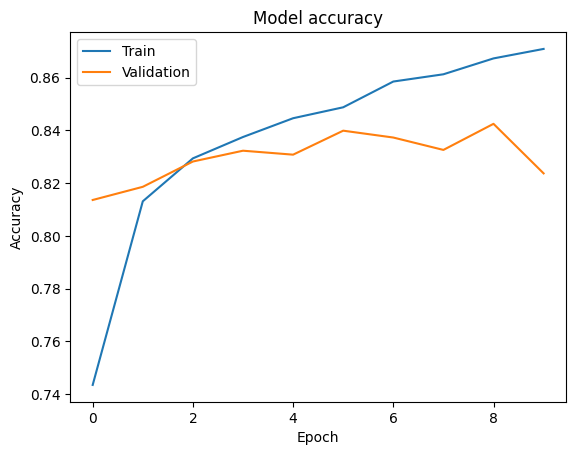

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [42]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 140ms/step - accuracy: 0.8216 - loss: 0.4023


[0.39311936497688293, 0.8237000107765198]

In [53]:
ypred = model.predict(X_test)

y_pred = []
for pred in ypred:
    if(pred >=0.5):
        y_pred.append(1)
    else:
        y_pred.append(0)

313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 140ms/step


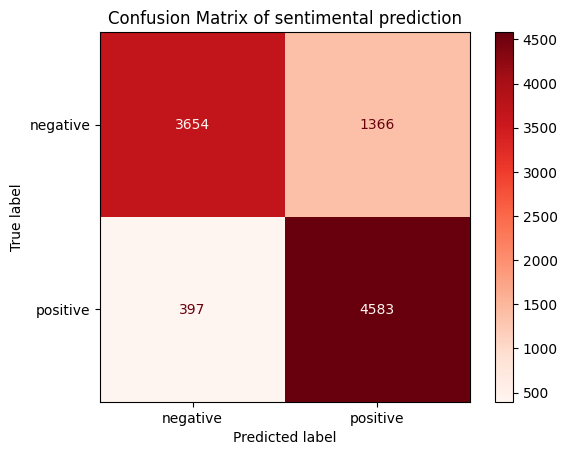

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["negative", "positive"])

disp.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix of sentimental prediction')
plt.show()

# Test the model

In [62]:
sentence = "this movie is so good and the actor is good"
print(sentence)
sentence = tokenizer.texts_to_sequences([sentence])
sentence = pad_sequences(sentence, maxlen=100, padding='post')


pred = model.predict(sentence)
if(pred >=0.5):
    print("positive")
else:
    print("negative")

this movie is so good and the actor is good
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
positive


In [67]:
sentence = df['review'][10]
real_sentiment = df['sentiment'][10]
print(sentence)
print(f'real label: {real_sentiment}')
sentence = tokenizer.texts_to_sequences([sentence])
sentence = pad_sequences(sentence, maxlen=100, padding='post')
pred = model.predict(sentence)
if(pred >=0.5):
    print("positive")
else:
    print("negative")

phil the alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlinesat first it was very odd and pretty funny but as the movie progressed i didnt find the jokes or oddness funny anymoreits a low budget film thats never a problem in itself there were some pretty interesting characters but eventually i just lost interesti imagine this film would appeal to a stoner who is currently partakingfor something similar but better try brother from another planet
real label: negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
negative
